In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy
import datetime
import torch
import gym
import custom_gym
import random
from config import cfg_seed, cfg_env, cfg_z_dim, cfg_default_lr, cfg_default_early
seed = cfg_seed
env_str=cfg_env
default_lr=cfg_default_lr
default_early=cfg_default_early

if cfg_env == "pendulum":
    env_name = "CustomPendulum-v0"
if cfg_env == "cartpole":
    env_name = "CustomCartPole-v0"

figfilenamehead = "fig_policy_evaluation_"+cfg_env+"_"

num_iter_max=200000


In [2]:
env = gym.make(env_name)


random.seed(seed)
np.random.seed(seed)
env.seed(seed)
env.action_space.seed(seed)
torch.manual_seed(seed)

s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = cfg_z_dim
print(s_dim, a_dim, z_dim)


4 1 2


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:268: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


In [3]:
# from sac import SAC
# agent = SAC(env.observation_space.shape[0], env.action_space)
# agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_"+env_str+"_mdp_", evaluate=True)

In [4]:
# データ生成
from get_offline_data import getOfflineData
getOfflineData(env_name=env_name, episode_num=100, seed=seed)

/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [5]:
offline_data = pickle.load(open("offline_data_"+env_str+".pkl","rb"))

debug_info = pickle.load(open("offline_data_debug_info_"+env_str+".pkl","rb"))
debug_info = np.array(debug_info)
print("offline_data[1].sum()", offline_data[1].sum())
print(debug_info.shape)
# c_array = debug_info[:,1]

# episode_index = 9
# plt.plot(offline_data[episode_index][:,0],offline_data[episode_index][:,1])
# print("env_param: ",debug_info[episode_index])

offline_data[1].sum() tensor(-629.9164)
(100, 2)


In [6]:
# import importlib
# importlib.reload(vi_base)
import vi_base

args_init_dict = {
    "offline_data": offline_data,
    "s_dim": s_dim,
    "a_dim": a_dim,
    "z_dim": z_dim,
    #              "policy":agent.select_action,
    "mdp_policy":None,
    "bamdp_policy":None,
    "debug_info":debug_info,
    "env" : env,
    "ckpt_suffix" : env_str,
    }

vi = vi_base.baseVI(args_init_dict)
# print(np.random.randn())

dec: h_dim 64


In [7]:
train_curve1, valid_curve1 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=1)
vi.update_mulogvar_offlinedata()

# train_curve2, valid_curve2 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=2)
# vi.update_mulogvar_offlinedata()

# train_curve3, valid_curve3 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=3)
# vi.update_mulogvar_offlinedata()


train_vae: enc_dec
train: iter 0  trainloss 758.98932  validloss 1277.95602±0.00000  bestvalidloss 1277.95602  last_update 0
train: iter 1  trainloss 401.18172  validloss 476.58524±0.00000  bestvalidloss 476.58524  last_update 0
train: iter 2  trainloss 86.96178  validloss 216.05511±0.00000  bestvalidloss 216.05511  last_update 0
train: iter 3  trainloss 36.71726  validloss 50.02952±0.00000  bestvalidloss 50.02952  last_update 0
train: iter 4  trainloss -171.58798  validloss -30.08887±0.00000  bestvalidloss -30.08887  last_update 0
train: iter 5  trainloss -310.21976  validloss -192.17689±0.00000  bestvalidloss -192.17689  last_update 0
train: iter 6  trainloss -412.86820  validloss -318.80389±0.00000  bestvalidloss -318.80389  last_update 0
train: iter 7  trainloss -505.07276  validloss -467.47201±0.00000  bestvalidloss -467.47201  last_update 0
train: iter 8  trainloss -594.40942  validloss -478.50148±0.00000  bestvalidloss -478.50148  last_update 0
train: iter 9  trainloss -698.6471

train: iter 75  trainloss -1074.55102  validloss -1179.54587±0.00000  bestvalidloss -1517.96631  last_update 2
train: iter 76  trainloss -1395.12751  validloss -662.31178±0.00000  bestvalidloss -1517.96631  last_update 3
train: iter 77  trainloss -1588.13798  validloss -1473.62390±0.00000  bestvalidloss -1517.96631  last_update 4
train: iter 78  trainloss -1555.06700  validloss -1510.43419±0.00000  bestvalidloss -1517.96631  last_update 5
train: iter 79  trainloss -1568.66406  validloss -1340.57903±0.00000  bestvalidloss -1517.96631  last_update 6
train: iter 80  trainloss -1396.70131  validloss -1206.38925±0.00000  bestvalidloss -1517.96631  last_update 7
train: iter 81  trainloss -1619.31732  validloss -1449.26719±0.00000  bestvalidloss -1517.96631  last_update 8
train: iter 82  trainloss -1641.35730  validloss -1546.02252±0.00000  bestvalidloss -1546.02252  last_update 0
train: iter 83  trainloss -1424.84414  validloss -1518.98477±0.00000  bestvalidloss -1546.02252  last_update 1
tr

train: iter 149  trainloss -1767.05849  validloss -1237.74593±0.00000  bestvalidloss -1842.71380  last_update 3
train: iter 150  trainloss -1843.70796  validloss -1842.07975±0.00000  bestvalidloss -1842.71380  last_update 4
train: iter 151  trainloss -1879.36418  validloss -1757.97905±0.00000  bestvalidloss -1842.71380  last_update 5
train: iter 152  trainloss -1870.20448  validloss -1807.68434±0.00000  bestvalidloss -1842.71380  last_update 6
train: iter 153  trainloss -1877.83250  validloss -1687.52953±0.00000  bestvalidloss -1842.71380  last_update 7
train: iter 154  trainloss -1695.84229  validloss -1841.44954±0.00000  bestvalidloss -1842.71380  last_update 8
train: iter 155  trainloss -1860.58980  validloss -1719.01653±0.00000  bestvalidloss -1842.71380  last_update 9
train: iter 156  trainloss -1901.33299  validloss -1805.39404±0.00000  bestvalidloss -1842.71380  last_update 10
train: iter 157  trainloss -1836.23417  validloss -1845.49476±0.00000  bestvalidloss -1845.49476  last_

train: iter 223  trainloss -1974.29761  validloss -1934.45902±0.00000  bestvalidloss -1942.07365  last_update 4
train: iter 224  trainloss -1933.50374  validloss -1890.94378±0.00000  bestvalidloss -1942.07365  last_update 5
train: iter 225  trainloss -1563.00710  validloss -1627.93423±0.00000  bestvalidloss -1942.07365  last_update 6
train: iter 226  trainloss -1894.47086  validloss -1845.33864±0.00000  bestvalidloss -1942.07365  last_update 7
train: iter 227  trainloss -1969.64520  validloss -1902.62108±0.00000  bestvalidloss -1942.07365  last_update 8
train: iter 228  trainloss -1961.16275  validloss -1855.43396±0.00000  bestvalidloss -1942.07365  last_update 9
train: iter 229  trainloss -1878.64805  validloss -1896.52968±0.00000  bestvalidloss -1942.07365  last_update 10
train: iter 230  trainloss -1961.30001  validloss -1823.60780±0.00000  bestvalidloss -1942.07365  last_update 11
train: iter 231  trainloss -1942.50846  validloss -1916.87770±0.00000  bestvalidloss -1942.07365  last

train: iter 296  trainloss -1988.13235  validloss -1687.00446±0.00000  bestvalidloss -2000.04026  last_update 10
train: iter 297  trainloss -1898.47579  validloss -1933.71180±0.00000  bestvalidloss -2000.04026  last_update 11
train: iter 298  trainloss -2006.84749  validloss -1971.42971±0.00000  bestvalidloss -2000.04026  last_update 12
train: iter 299  trainloss -2018.91498  validloss -2001.90267±0.00000  bestvalidloss -2001.90267  last_update 0
train: iter 300  trainloss -2013.23610  validloss -1980.99917±0.00000  bestvalidloss -2001.90267  last_update 1
train: iter 301  trainloss -2032.86090  validloss -1997.58943±0.00000  bestvalidloss -2001.90267  last_update 2
train: iter 302  trainloss -1791.14306  validloss -1916.47551±0.00000  bestvalidloss -2001.90267  last_update 3
train: iter 303  trainloss -1969.96968  validloss -1944.68824±0.00000  bestvalidloss -2001.90267  last_update 4
train: iter 304  trainloss -2026.53000  validloss -1982.56834±0.00000  bestvalidloss -2001.90267  las

train: iter 369  trainloss -2054.75737  validloss -1980.89487±0.00000  bestvalidloss -2022.08007  last_update 5
train: iter 370  trainloss -2000.53573  validloss -2032.79468±0.00000  bestvalidloss -2032.79468  last_update 0
train: iter 371  trainloss -1999.09512  validloss -1907.24575±0.00000  bestvalidloss -2032.79468  last_update 1
train: iter 372  trainloss -2020.75068  validloss -1751.12201±0.00000  bestvalidloss -2032.79468  last_update 2
train: iter 373  trainloss -1405.15252  validloss -1846.06786±0.00000  bestvalidloss -2032.79468  last_update 3
train: iter 374  trainloss -1977.24800  validloss -1878.29783±0.00000  bestvalidloss -2032.79468  last_update 4
train: iter 375  trainloss -2014.89970  validloss -2000.02975±0.00000  bestvalidloss -2032.79468  last_update 5
train: iter 376  trainloss -1862.37105  validloss -1964.15532±0.00000  bestvalidloss -2032.79468  last_update 6
train: iter 377  trainloss -2050.29637  validloss -1993.84249±0.00000  bestvalidloss -2032.79468  last_u

train: iter 442  trainloss -2059.05709  validloss -2006.25477±0.00000  bestvalidloss -2032.79468  last_update 72
train: iter 443  trainloss -1987.04351  validloss -2015.16746±0.00000  bestvalidloss -2032.79468  last_update 73
train: iter 444  trainloss -2000.44074  validloss -1943.29235±0.00000  bestvalidloss -2032.79468  last_update 74
train: iter 445  trainloss -2009.99395  validloss -1996.28962±0.00000  bestvalidloss -2032.79468  last_update 75
train: iter 446  trainloss -2036.15472  validloss -1994.06169±0.00000  bestvalidloss -2032.79468  last_update 76
train: iter 447  trainloss -2023.48999  validloss -2008.25084±0.00000  bestvalidloss -2032.79468  last_update 77
train: iter 448  trainloss -1983.07419  validloss -1969.69835±0.00000  bestvalidloss -2032.79468  last_update 78
train: iter 449  trainloss -1984.86860  validloss -1978.63766±0.00000  bestvalidloss -2032.79468  last_update 79
train: iter 450  trainloss -1770.42790  validloss -1876.67414±0.00000  bestvalidloss -2032.79468

train: iter 515  trainloss -2062.42733  validloss -1952.38995±0.00000  bestvalidloss -2039.27515  last_update 26
train: iter 516  trainloss -2057.09912  validloss -1977.22106±0.00000  bestvalidloss -2039.27515  last_update 27
train: iter 517  trainloss -2027.39117  validloss -1960.28373±0.00000  bestvalidloss -2039.27515  last_update 28
train: iter 518  trainloss -2046.75536  validloss -2022.39174±0.00000  bestvalidloss -2039.27515  last_update 29
train: iter 519  trainloss -2049.49171  validloss -2009.47748±0.00000  bestvalidloss -2039.27515  last_update 30
train: iter 520  trainloss -2014.93250  validloss -2026.74409±0.00000  bestvalidloss -2039.27515  last_update 31
train: iter 521  trainloss -1998.37284  validloss -1970.37014±0.00000  bestvalidloss -2039.27515  last_update 32
train: iter 522  trainloss -2070.73193  validloss -1973.45209±0.00000  bestvalidloss -2039.27515  last_update 33
train: iter 523  trainloss -2063.76300  validloss -2023.64667±0.00000  bestvalidloss -2039.27515

train: iter 588  trainloss -2071.35049  validloss -1984.30194±0.00000  bestvalidloss -2045.40173  last_update 14
train: iter 589  trainloss -2080.81609  validloss -2047.88411±0.00000  bestvalidloss -2047.88411  last_update 0
train: iter 590  trainloss -2046.82468  validloss -2019.27897±0.00000  bestvalidloss -2047.88411  last_update 1
train: iter 591  trainloss -1798.37652  validloss -1528.66492±0.00000  bestvalidloss -2047.88411  last_update 2
train: iter 592  trainloss -2078.21351  validloss -2014.35837±0.00000  bestvalidloss -2047.88411  last_update 3
train: iter 593  trainloss -2064.45341  validloss -1998.30112±0.00000  bestvalidloss -2047.88411  last_update 4
train: iter 594  trainloss -2043.14577  validloss -1871.28240±0.00000  bestvalidloss -2047.88411  last_update 5
train: iter 595  trainloss -2054.08461  validloss -2028.69443±0.00000  bestvalidloss -2047.88411  last_update 6
train: iter 596  trainloss -1772.00980  validloss -1951.64044±0.00000  bestvalidloss -2047.88411  last_

train: iter 661  trainloss -2077.48575  validloss -2008.13497±0.00000  bestvalidloss -2053.44511  last_update 40
train: iter 662  trainloss -2079.63797  validloss -2024.07134±0.00000  bestvalidloss -2053.44511  last_update 41
train: iter 663  trainloss -2065.72099  validloss -1990.42716±0.00000  bestvalidloss -2053.44511  last_update 42
train: iter 664  trainloss -1941.11623  validloss -1924.33683±0.00000  bestvalidloss -2053.44511  last_update 43
train: iter 665  trainloss -2014.97297  validloss -1735.40660±0.00000  bestvalidloss -2053.44511  last_update 44
train: iter 666  trainloss -2041.25397  validloss -1983.96897±0.00000  bestvalidloss -2053.44511  last_update 45
train: iter 667  trainloss -1975.95128  validloss -2037.65580±0.00000  bestvalidloss -2053.44511  last_update 46
train: iter 668  trainloss -2070.17751  validloss -1971.64332±0.00000  bestvalidloss -2053.44511  last_update 47
train: iter 669  trainloss -2025.84422  validloss -1848.08702±0.00000  bestvalidloss -2053.44511

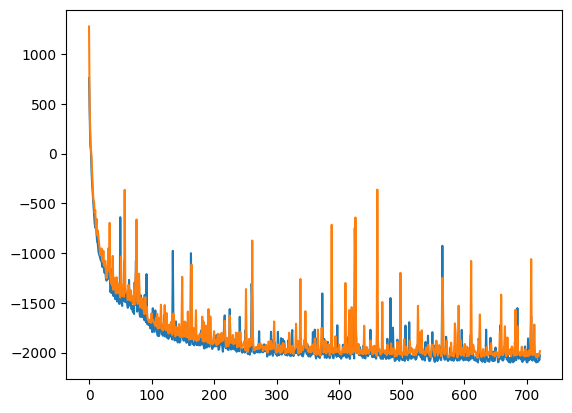

In [8]:
plt.plot(train_curve1)
plt.plot(valid_curve1)
# plt.ylim([-2000, 1000])
plt.show()

# plt.plot(train_curve2)
# plt.plot(valid_curve2)
# plt.show()

# plt.plot(train_curve3)
# plt.plot(valid_curve3)
# plt.show()

In [9]:
train_curve, valid_curve = vi.train_initial_belief(num_iter=100000, lr=1e-3, early_stop_step=default_early)


train: iter 0  trainloss 5.24595  validloss 5.47176±0.00000  bestvalidloss 5.47176  last_update 0
train: iter 1  trainloss 4.83215  validloss 5.04838±0.00000  bestvalidloss 5.04838  last_update 0
train: iter 2  trainloss 4.48918  validloss 4.68891±0.00000  bestvalidloss 4.68891  last_update 0
train: iter 3  trainloss 4.19165  validloss 4.34984±0.00000  bestvalidloss 4.34984  last_update 0
train: iter 4  trainloss 3.91415  validloss 4.05729±0.00000  bestvalidloss 4.05729  last_update 0
train: iter 5  trainloss 3.67754  validloss 3.79873±0.00000  bestvalidloss 3.79873  last_update 0
train: iter 6  trainloss 3.45115  validloss 3.56447±0.00000  bestvalidloss 3.56447  last_update 0
train: iter 7  trainloss 3.24137  validloss 3.35904±0.00000  bestvalidloss 3.35904  last_update 0
train: iter 8  trainloss 3.04717  validloss 3.15761±0.00000  bestvalidloss 3.15761  last_update 0
train: iter 9  trainloss 2.87067  validloss 2.97101±0.00000  bestvalidloss 2.97101  last_update 0
train: iter 10  trai

train: iter 89  trainloss -1.86000  validloss -2.15404±0.00000  bestvalidloss -2.15404  last_update 0
train: iter 90  trainloss -1.85706  validloss -2.13943±0.00000  bestvalidloss -2.15404  last_update 1
train: iter 91  trainloss -1.85230  validloss -2.21852±0.00000  bestvalidloss -2.21852  last_update 0
train: iter 92  trainloss -1.86518  validloss -2.24358±0.00000  bestvalidloss -2.24358  last_update 0
train: iter 93  trainloss -1.92436  validloss -2.20512±0.00000  bestvalidloss -2.24358  last_update 1
train: iter 94  trainloss -1.92885  validloss -2.29552±0.00000  bestvalidloss -2.29552  last_update 0
train: iter 95  trainloss -1.92443  validloss -2.30112±0.00000  bestvalidloss -2.30112  last_update 0
train: iter 96  trainloss -1.93072  validloss -2.34619±0.00000  bestvalidloss -2.34619  last_update 0
train: iter 97  trainloss -1.95478  validloss -2.34153±0.00000  bestvalidloss -2.34619  last_update 1
train: iter 98  trainloss -1.96627  validloss -2.34798±0.00000  bestvalidloss -2.3

train: iter 179  trainloss -2.05512  validloss -2.66797±0.00000  bestvalidloss -2.69516  last_update 26
train: iter 180  trainloss -2.03714  validloss -2.54833±0.00000  bestvalidloss -2.69516  last_update 27
train: iter 181  trainloss -2.08361  validloss -2.64579±0.00000  bestvalidloss -2.69516  last_update 28
train: iter 182  trainloss -2.02975  validloss -2.59595±0.00000  bestvalidloss -2.69516  last_update 29
train: iter 183  trainloss -2.05269  validloss -2.65329±0.00000  bestvalidloss -2.69516  last_update 30
train: iter 184  trainloss -2.04845  validloss -2.61028±0.00000  bestvalidloss -2.69516  last_update 31
train: iter 185  trainloss -2.03844  validloss -2.59700±0.00000  bestvalidloss -2.69516  last_update 32
train: iter 186  trainloss -1.98922  validloss -2.63816±0.00000  bestvalidloss -2.69516  last_update 33
train: iter 187  trainloss -2.05806  validloss -2.69744±0.00000  bestvalidloss -2.69744  last_update 0
train: iter 188  trainloss -2.10579  validloss -2.63834±0.00000  

train: iter 259  trainloss -2.01617  validloss -2.61172±0.00000  bestvalidloss -2.72661  last_update 44
train: iter 260  trainloss -2.09473  validloss -2.67624±0.00000  bestvalidloss -2.72661  last_update 45
train: iter 261  trainloss -2.07282  validloss -2.64829±0.00000  bestvalidloss -2.72661  last_update 46
train: iter 262  trainloss -2.08059  validloss -2.61640±0.00000  bestvalidloss -2.72661  last_update 47
train: iter 263  trainloss -2.00533  validloss -2.47814±0.00000  bestvalidloss -2.72661  last_update 48
train: iter 264  trainloss -2.00935  validloss -2.68089±0.00000  bestvalidloss -2.72661  last_update 49
train: iter 265  trainloss -2.03481  validloss -2.67377±0.00000  bestvalidloss -2.72661  last_update 50
train: iter 266  trainloss -2.05163  validloss -2.67983±0.00000  bestvalidloss -2.72661  last_update 51
train: iter 267  trainloss -2.06340  validloss -2.69320±0.00000  bestvalidloss -2.72661  last_update 52
train: iter 268  trainloss -2.03387  validloss -2.62058±0.00000 

train: iter 345  trainloss -2.03245  validloss -2.63279±0.00000  bestvalidloss -2.73710  last_update 48
train: iter 346  trainloss -2.01933  validloss -2.57852±0.00000  bestvalidloss -2.73710  last_update 49
train: iter 347  trainloss -2.05301  validloss -2.60818±0.00000  bestvalidloss -2.73710  last_update 50
train: iter 348  trainloss -2.05137  validloss -2.58108±0.00000  bestvalidloss -2.73710  last_update 51
train: iter 349  trainloss -1.99839  validloss -2.66281±0.00000  bestvalidloss -2.73710  last_update 52
train: iter 350  trainloss -2.06360  validloss -2.58194±0.00000  bestvalidloss -2.73710  last_update 53
train: iter 351  trainloss -2.05221  validloss -2.66249±0.00000  bestvalidloss -2.73710  last_update 54
train: iter 352  trainloss -2.04333  validloss -2.63688±0.00000  bestvalidloss -2.73710  last_update 55
train: iter 353  trainloss -2.06228  validloss -2.64542±0.00000  bestvalidloss -2.73710  last_update 56
train: iter 354  trainloss -2.06093  validloss -2.58947±0.00000 

In [10]:
print(vi.initial_belief)

Parameter containing:
tensor([ 1.0532,  2.4792, -4.5338, -5.2497], requires_grad=True)


In [11]:
train_curve, valid_curve = vi.train_penalty(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early)

train: iter 0  trainloss 101.66546  validloss 107.75871±0.00000  bestvalidloss 107.75871  last_update 0
train: iter 1  trainloss 77.20132  validloss 84.51707±0.00000  bestvalidloss 84.51707  last_update 0
train: iter 2  trainloss 57.79447  validloss 61.86759±0.00000  bestvalidloss 61.86759  last_update 0
train: iter 3  trainloss 45.20485  validloss 47.52092±0.00000  bestvalidloss 47.52092  last_update 0
train: iter 4  trainloss 36.12989  validloss 37.09838±0.00000  bestvalidloss 37.09838  last_update 0
train: iter 5  trainloss 29.06865  validloss 29.77612±0.00000  bestvalidloss 29.77612  last_update 0
train: iter 6  trainloss 23.41855  validloss 23.89229±0.00000  bestvalidloss 23.89229  last_update 0
train: iter 7  trainloss 18.89349  validloss 18.93600±0.00000  bestvalidloss 18.93600  last_update 0
train: iter 8  trainloss 15.29892  validloss 15.28047±0.00000  bestvalidloss 15.28047  last_update 0
train: iter 9  trainloss 12.31101  validloss 12.24931±0.00000  bestvalidloss 12.24931  l

train: iter 83  trainloss 1.56818  validloss 2.15300±0.00000  bestvalidloss 2.09314  last_update 5
train: iter 84  trainloss 1.51869  validloss 2.21775±0.00000  bestvalidloss 2.09314  last_update 6
train: iter 85  trainloss 1.53699  validloss 2.17665±0.00000  bestvalidloss 2.09314  last_update 7
train: iter 86  trainloss 1.53879  validloss 2.11162±0.00000  bestvalidloss 2.09314  last_update 8
train: iter 87  trainloss 1.53056  validloss 2.19475±0.00000  bestvalidloss 2.09314  last_update 9
train: iter 88  trainloss 1.55613  validloss 2.29940±0.00000  bestvalidloss 2.09314  last_update 10
train: iter 89  trainloss 1.53295  validloss 2.21833±0.00000  bestvalidloss 2.09314  last_update 11
train: iter 90  trainloss 1.52819  validloss 2.26504±0.00000  bestvalidloss 2.09314  last_update 12
train: iter 91  trainloss 1.53446  validloss 2.13696±0.00000  bestvalidloss 2.09314  last_update 13
train: iter 92  trainloss 1.52645  validloss 2.11834±0.00000  bestvalidloss 2.09314  last_update 14
train

train: iter 165  trainloss 1.48280  validloss 2.28264±0.00000  bestvalidloss 2.09314  last_update 87
train: iter 166  trainloss 1.48650  validloss 2.23140±0.00000  bestvalidloss 2.09314  last_update 88
train: iter 167  trainloss 1.47439  validloss 2.26607±0.00000  bestvalidloss 2.09314  last_update 89
train: iter 168  trainloss 1.48840  validloss 2.31714±0.00000  bestvalidloss 2.09314  last_update 90
train: iter 169  trainloss 1.50358  validloss 2.13677±0.00000  bestvalidloss 2.09314  last_update 91
train: iter 170  trainloss 1.46923  validloss 2.14206±0.00000  bestvalidloss 2.09314  last_update 92
train: iter 171  trainloss 1.48668  validloss 2.27891±0.00000  bestvalidloss 2.09314  last_update 93
train: iter 172  trainloss 1.47669  validloss 2.29072±0.00000  bestvalidloss 2.09314  last_update 94
train: iter 173  trainloss 1.47446  validloss 2.23153±0.00000  bestvalidloss 2.09314  last_update 95
train: iter 174  trainloss 1.47478  validloss 2.22015±0.00000  bestvalidloss 2.09314  last_

In [12]:

vi.save(ckpt_key="unweighted")

base save ckpt ckpt_basevi_cartpole_unweighted
base load self.initial_belief.data.sum() tensor(-6.2511)
base load dec.state_dict()['net_phat.0.weight'].sum() tensor(-5.0844)


In [13]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

-0.07186930396773475
tensor([-0.2419])
